# SCALABLE DATABASE MIDTERM 2023
# DATA MINERS
# Abhrajit Das          
# Ved Aralkar    
# Sai Bhere

# PROJECT SUMMARY
This project successfully analyzed the NYPD Crime Data, providing valuable insights into the patterns and trends of criminal activities in New York City. Key findings include the identification of peak crime months, prevalent crime types, and the influence of external factors like weather and holidays on crime rates. The project demonstrates the power of data analysis in understanding and potentially predicting criminal activities, which can aid in law enforcement and public safety planning.

In [52]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import pandas as pd

# Loading the datasets
nypd_data_path = 'NYPD_Data_2003_Onwards.csv'
holiday_list_path = 'holiday_list.csv'
weather_data_path = 'nyc_temp_2003_2021.csv'

nypd_data = pd.read_csv(nypd_data_path)
holiday_list = pd.read_csv(holiday_list_path)
weather_data = pd.read_csv(weather_data_path)

In [53]:
#Displaying the first few rows of each dataset to understand their structure
nypd_data.head(), holiday_list.head(), weather_data.head()

(  CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
 0  247853895         43.0          BRONX   2022-07-11     09:09:00   
 1  250722124         67.0       BROOKLYN   2021-01-01     12:00:00   
 2  239511545        120.0  STATEN ISLAND   2021-12-24     08:00:00   
 3  247992275        115.0         QUEENS   2015-06-15     00:01:00   
 4  239602232         75.0       BROOKLYN   2018-01-01     09:00:00   
 
   CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
 0          NaN       (null)        COMPLETED     (null)          NaN  ...   
 1   09/07/2022     12:00:00        COMPLETED     (null)          NaN  ...   
 2   01/03/2022     08:00:00        COMPLETED     (null)          NaN  ...   
 3   07/13/2022     17:00:00        COMPLETED     (null)          NaN  ...   
 4   04/14/2021     23:59:00        COMPLETED     (null)          NaN  ...   
 
    VIC_AGE_GROUP                  VIC_RACE  VIC_SEX X_COORD_CD Y_COORD_CD  \
 0        UNKNOWN       

In [54]:
nypd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396775 entries, 0 to 396774
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                396775 non-null  object 
 1   ADDR_PCT_CD               396755 non-null  float64
 2   BORO_NM                   396775 non-null  object 
 3   CMPLNT_FR_DT              396775 non-null  object 
 4   CMPLNT_FR_TM              396775 non-null  object 
 5   CMPLNT_TO_DT              367409 non-null  object 
 6   CMPLNT_TO_TM              396775 non-null  object 
 7   CRM_ATPT_CPTD_CD          396775 non-null  object 
 8   HADEVELOPT                396775 non-null  object 
 9   HOUSING_PSA               25450 non-null   float64
 10  JURISDICTION_CODE         396775 non-null  int64  
 11  JURIS_DESC                396775 non-null  object 
 12  KY_CD                     396775 non-null  int64  
 13  LAW_CAT_CD                396775 non-null  o

# Data Cleaning

In [55]:
# Drop unwanted columns
nypd_data.drop(["CMPLNT_TO_DT", "CMPLNT_TO_TM", "HADEVELOPT", "HOUSING_PSA", "JURISDICTION_CODE", "JURIS_DESC", "PARKS_NM", "PATROL_BORO", "PD_CD", "PD_DESC", "STATION_NAME", "TRANSIT_DISTRICT", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "Lat_Lon", "New Georeferenced Column"], axis=1, inplace=True )

In [56]:
# Rename Columns
nypd_data.rename(columns={"CMPLNT_NUM" : "Complaint_Id",
"ADDR_PCT_CD": "Neighborhood",
"BORO_NM": "Borough",	
"CMPLNT_FR_DT": "Start_Date",
"CMPLNT_FR_TM": "Start_Time",	
"CRM_ATPT_CPTD_CD": "Status",	
"KY_CD": "Offence_Code",	
"LAW_CAT_CD": "Offence_Category",	
"LOC_OF_OCCUR_DESC": "Offence_Location",	
"OFNS_DESC": "Offence_Type",
"PREM_TYP_DESC": "Offence_Location_Type",
"RPT_DT": "Reported_Date",
"SUSP_AGE_GROUP": "Suspect_Age",
"SUSP_RACE" : "Suspect_Race", 	
"SUSP_SEX": "Suspect_Sex",	
"VIC_AGE_GROUP": "Victim_Age",
"VIC_RACE": "Victim_Race",
"VIC_SEX": "Victim_Sex"}, inplace=True)

In [57]:
nypd_data

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year
0,247853895,43.0,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,2022.0
1,250722124,67.0,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F,2021.0
2,239511545,120.0,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,(null),(null),(null),18-24,ASIAN / PACIFIC ISLANDER,M,2021.0
3,247992275,115.0,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,(null),(null),(null),45-64,WHITE,M,2015.0
4,239602232,75.0,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,(null),(null),(null),65+,BLACK,M,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,251818673,46.0,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F,2022.0
396771,251891178,94.0,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,2022.0
396772,251788586,79.0,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E,2022.0
396773,251833912,70.0,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F,2022.0


In [58]:
nypd_data = nypd_data.replace('(null)', np.NaN)
nypd_data = nypd_data.replace('', np.NaN)

In [59]:
nypd_data

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year
0,247853895,43.0,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,2022.0
1,250722124,67.0,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F,2021.0
2,239511545,120.0,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,NaN,NaN,NaN,18-24,ASIAN / PACIFIC ISLANDER,M,2021.0
3,247992275,115.0,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,NaN,NaN,NaN,45-64,WHITE,M,2015.0
4,239602232,75.0,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,NaN,NaN,NaN,65+,BLACK,M,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,251818673,46.0,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F,2022.0
396771,251891178,94.0,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,2022.0
396772,251788586,79.0,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E,2022.0
396773,251833912,70.0,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F,2022.0


In [60]:
nypd_data.isnull().sum()

Complaint_Id                 0
Neighborhood                20
Borough                    657
Start_Date                   0
Start_Time                   0
Status                       0
Offence_Code                 0
Offence_Category             0
Offence_Location         66064
Offence_Type                 5
Offence_Location_Type      474
Reported_Date                0
Suspect_Age              73483
Suspect_Race             73483
Suspect_Sex              73483
Victim_Age                   0
Victim_Race                104
Victim_Sex                   0
Year                         0
dtype: int64

In [61]:
nypd_data['Neighborhood'] = nypd_data['Neighborhood'].fillna(0)
nypd_data['Borough'] = nypd_data['Borough'].fillna('UNKNOWN')
nypd_data.isnull().sum()

Complaint_Id                 0
Neighborhood                 0
Borough                      0
Start_Date                   0
Start_Time                   0
Status                       0
Offence_Code                 0
Offence_Category             0
Offence_Location         66064
Offence_Type                 5
Offence_Location_Type      474
Reported_Date                0
Suspect_Age              73483
Suspect_Race             73483
Suspect_Sex              73483
Victim_Age                   0
Victim_Race                104
Victim_Sex                   0
Year                         0
dtype: int64

In [62]:
nypd_data.update(nypd_data[["Offence_Location", "Offence_Type", "Offence_Location_Type", "Suspect_Race", "Victim_Race", "Suspect_Age", "Victim_Age"]].fillna("UNKNOWN"))

In [63]:
nypd_data['Suspect_Sex'] = nypd_data['Suspect_Sex'].fillna('U')

In [64]:
nypd_data

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year
0,247853895,43.0,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,2022.0
1,250722124,67.0,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F,2021.0
2,239511545,120.0,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,UNKNOWN,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,M,2021.0
3,247992275,115.0,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,UNKNOWN,UNKNOWN,U,45-64,WHITE,M,2015.0
4,239602232,75.0,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,251818673,46.0,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F,2022.0
396771,251891178,94.0,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,2022.0
396772,251788586,79.0,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E,2022.0
396773,251833912,70.0,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F,2022.0


In [65]:
nypd_data.isnull().sum()

Complaint_Id             0
Neighborhood             0
Borough                  0
Start_Date               0
Start_Time               0
Status                   0
Offence_Code             0
Offence_Category         0
Offence_Location         0
Offence_Type             0
Offence_Location_Type    0
Reported_Date            0
Suspect_Age              0
Suspect_Race             0
Suspect_Sex              0
Victim_Age               0
Victim_Race              0
Victim_Sex               0
Year                     0
dtype: int64

In [66]:
#Datatypes of the columns 
nypd_data.dtypes

Complaint_Id              object
Neighborhood             float64
Borough                   object
Start_Date                object
Start_Time                object
Status                    object
Offence_Code               int64
Offence_Category          object
Offence_Location          object
Offence_Type              object
Offence_Location_Type     object
Reported_Date             object
Suspect_Age               object
Suspect_Race              object
Suspect_Sex               object
Victim_Age                object
Victim_Race               object
Victim_Sex                object
Year                     float64
dtype: object

In [67]:
nypd_data[["Neighborhood"]] = nypd_data[["Neighborhood"]].astype("int64")
nypd_data.dtypes

Complaint_Id              object
Neighborhood               int64
Borough                   object
Start_Date                object
Start_Time                object
Status                    object
Offence_Code               int64
Offence_Category          object
Offence_Location          object
Offence_Type              object
Offence_Location_Type     object
Reported_Date             object
Suspect_Age               object
Suspect_Race              object
Suspect_Sex               object
Victim_Age                object
Victim_Race               object
Victim_Sex                object
Year                     float64
dtype: object

In [68]:
def update_date_format(dataframe, col_name, date_first):
  return np.where(
    dataframe[col_name].str.contains('/'), 
    pd.to_datetime(dataframe[col_name], errors = 'coerce'), 
    pd.to_datetime(dataframe[col_name], errors = 'coerce', dayfirst=date_first)
  )

nypd_data["Start_Date"] = update_date_format(nypd_data, "Start_Date", False)
nypd_data["Reported_Date"] = update_date_format(nypd_data, "Reported_Date", False)

nypd_data.dtypes

Complaint_Id                     object
Neighborhood                      int64
Borough                          object
Start_Date               datetime64[ns]
Start_Time                       object
Status                           object
Offence_Code                      int64
Offence_Category                 object
Offence_Location                 object
Offence_Type                     object
Offence_Location_Type            object
Reported_Date            datetime64[ns]
Suspect_Age                      object
Suspect_Race                     object
Suspect_Sex                      object
Victim_Age                       object
Victim_Race                      object
Victim_Sex                       object
Year                            float64
dtype: object

In [69]:
#New Columns for start and reported year, month 

def create_year_month_cols(data_frame, col_name):
  return {
      "month": pd.DatetimeIndex(data_frame[col_name]).month, 
      "year": pd.DatetimeIndex(data_frame[col_name]).year
    }

start_year_month = create_year_month_cols(nypd_data, "Start_Date")
nypd_data["Start_Date_Month"] = start_year_month["month"]
nypd_data["Start_Date_Year"] = start_year_month["year"]

rep_year_month = create_year_month_cols(nypd_data, "Reported_Date")
nypd_data["Reported_Date_Month"] = rep_year_month["month"]
nypd_data["Reported_Date_Year"] = rep_year_month["year"]

nypd_data[["Complaint_Id", "Start_Date", "Reported_Date", "Start_Date_Month", "Start_Date_Year"]]

,Complaint_Id,Start_Date,Reported_Date,Start_Date_Month,Start_Date_Year
0,247853895,2022-07-11,2022-07-11,7,2022
1,250722124,2021-01-01,2022-09-07,1,2021
2,239511545,2021-12-24,2022-01-21,12,2021
3,247992275,2015-06-15,2022-07-13,6,2015
4,239602232,2018-01-01,2022-01-24,1,2018
...,...,...,...,...,...
396770,251818673,2022-09-29,2022-09-29,9,2022
396771,251891178,2022-09-30,2022-09-30,9,2022
396772,251788586,2022-09-29,2022-09-29,9,2022
396773,251833912,2022-09-30,2022-09-30,9,2022


In [70]:
nypd_data[nypd_data.duplicated("Complaint_Id")]

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year,Start_Date_Month,Start_Date_Year,Reported_Date_Month,Reported_Date_Year
4527,240776535H1,46,BRONX,2022-01-01,02:45:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,WHITE HISPANIC,M,25-44,BLACK,M,2022.0,1,2022,1,2022
8082,242029394H1,47,BRONX,2021-06-01,12:00:00,COMPLETED,101,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,BLACK,F,<18,BLACK,M,2021.0,6,2021,3,2022
9141,240776535H1,46,BRONX,2022-01-01,02:45:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,WHITE HISPANIC,M,25-44,BLACK,M,2022.0,1,2022,1,2022
11278,8101169H6113,32,MANHATTAN,2005-03-06,07:00:00,COMPLETED,101,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,BLACK,M,18-24,BLACK,M,2005.0,3,2005,2,2022
17643,238885819H1,44,BRONX,2022-01-09,22:54:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,BLACK,F,25-44,BLACK HISPANIC,M,2022.0,1,2022,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376278,251216080H1,67,BROOKLYN,2022-09-17,02:41:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,UNKNOWN,U,25-44,BLACK,M,2022.0,9,2022,9,2022
380952,251246675H1,0,BRONX,2022-09-16,21:46:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,BLACK,M,25-44,BLACK,M,2022.0,9,2022,9,2022
383081,251246675H1,0,BRONX,2022-09-16,21:46:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,BLACK,M,25-44,BLACK,M,2022.0,9,2022,9,2022
391903,251583517H1,75,BROOKLYN,2022-09-25,03:26:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,UNKNOWN,U,25-44,BLACK HISPANIC,M,2022.0,9,2022,9,2022


In [71]:
nypd_data.drop_duplicates("Complaint_Id", inplace=True)

In [72]:
nypd_data

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Year,Start_Date_Month,Start_Date_Year,Reported_Date_Month,Reported_Date_Year
0,247853895,43,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,...,BLACK,M,UNKNOWN,UNKNOWN,D,2022.0,7,2022,7,2022
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,UNKNOWN,U,<18,BLACK,F,2021.0,1,2021,9,2022
2,239511545,120,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,...,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,M,2021.0,12,2021,1,2022
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,UNKNOWN,U,45-64,WHITE,M,2015.0,6,2015,7,2022
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,UNKNOWN,U,65+,BLACK,M,2018.0,1,2018,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396770,251818673,46,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,...,UNKNOWN,U,UNKNOWN,UNKNOWN,F,2022.0,9,2022,9,2022
396771,251891178,94,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,...,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,2022.0,9,2022,9,2022
396772,251788586,79,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,...,BLACK,M,UNKNOWN,UNKNOWN,E,2022.0,9,2022,9,2022
396773,251833912,70,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,...,BLACK,M,65+,BLACK,F,2022.0,9,2022,9,2022


In [73]:
#Displaying basic info and summary statistics
print(nypd_data.info(), nypd_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 396662 entries, 0 to 396774
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Complaint_Id           396662 non-null  object        
 1   Neighborhood           396662 non-null  int64         
 2   Borough                396662 non-null  object        
 3   Start_Date             396662 non-null  datetime64[ns]
 4   Start_Time             396662 non-null  object        
 5   Status                 396662 non-null  object        
 6   Offence_Code           396662 non-null  int64         
 7   Offence_Category       396662 non-null  object        
 8   Offence_Location       396662 non-null  object        
 9   Offence_Type           396662 non-null  object        
 10  Offence_Location_Type  396662 non-null  object        
 11  Reported_Date          396662 non-null  datetime64[ns]
 12  Suspect_Age            396662 non-null  object   

In [74]:
print(holiday_list.info(), holiday_list.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB
None             Month         Day         Year
count  342.000000  342.000000   342.000000
mean     7.263158   15.853801  2012.500000
std      3.899889    9.653330     5.195729
min      1.000000    1.000000  2004.000000
25%      4.000000    6.000000  2008.000000
50%      9.000000   16.500000  2012.500000
75%     11.000000   24.000000  2017.000000
max     12.000000   31.000000  2021.000000


In [75]:
print(weather_data.info(), weather_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6699 non-null   int64  
 1   MM/DD/YYYY  6699 non-null   object 
 2   YEAR        6699 non-null   int64  
 3   MONTH       6699 non-null   int64  
 4   DAY         6699 non-null   int64  
 5   TMAX        6699 non-null   float64
 6   TMIN        6699 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 366.5+ KB
None          Unnamed: 0         YEAR        MONTH          DAY         TMAX  \
count   6699.000000  6699.000000  6699.000000  6699.000000  6699.000000   
mean   52284.000000  2011.676220     6.449619    15.719063   170.595910   
std     1933.979059     5.297745     3.461854     8.802732   100.971882   
min    48935.000000  2003.000000     1.000000     1.000000  -105.000000   
25%    50609.500000  2007.000000     3.000000     8.000000    89.000000   
50%   

In [76]:
weather_data

,Unnamed: 0,MM/DD/YYYY,YEAR,MONTH,DAY,TMAX,TMIN
0,48935,2003-01-01,2003,1,1,100.0,22.0
1,48936,2003-01-02,2003,1,2,28.0,-17.0
2,48937,2003-01-03,2003,1,3,11.0,-17.0
3,48938,2003-01-04,2003,1,4,22.0,-6.0
4,48939,2003-01-05,2003,1,5,22.0,0.0
...,...,...,...,...,...,...,...
6694,55629,2021-04-30,2021,4,30,217.0,78.0
6695,55630,2021-05-01,2021,5,1,183.0,56.0
6696,55631,2021-05-02,2021,5,2,278.0,133.0
6697,55632,2021-05-03,2021,5,3,189.0,111.0


In [77]:
#Drop the 'Unnamed: 0' column from the weather_data DataFrame
weather_data.drop('Unnamed: 0', axis=1, inplace=True)

In [78]:
weather_data

,MM/DD/YYYY,YEAR,MONTH,DAY,TMAX,TMIN
0,2003-01-01,2003,1,1,100.0,22.0
1,2003-01-02,2003,1,2,28.0,-17.0
2,2003-01-03,2003,1,3,11.0,-17.0
3,2003-01-04,2003,1,4,22.0,-6.0
4,2003-01-05,2003,1,5,22.0,0.0
...,...,...,...,...,...,...
6694,2021-04-30,2021,4,30,217.0,78.0
6695,2021-05-01,2021,5,1,183.0,56.0
6696,2021-05-02,2021,5,2,278.0,133.0
6697,2021-05-03,2021,5,3,189.0,111.0


In [79]:
weather_data.rename(columns={"MM/DD/YYYY" : "Date"}, inplace=True)
weather_data

,Date,YEAR,MONTH,DAY,TMAX,TMIN
0,2003-01-01,2003,1,1,100.0,22.0
1,2003-01-02,2003,1,2,28.0,-17.0
2,2003-01-03,2003,1,3,11.0,-17.0
3,2003-01-04,2003,1,4,22.0,-6.0
4,2003-01-05,2003,1,5,22.0,0.0
...,...,...,...,...,...,...
6694,2021-04-30,2021,4,30,217.0,78.0
6695,2021-05-01,2021,5,1,183.0,56.0
6696,2021-05-02,2021,5,2,278.0,133.0
6697,2021-05-03,2021,5,3,189.0,111.0


In [80]:
#Converting 'Date' in weather_data to datetime if it's not already
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

In [81]:
#Calculating the average daily temperatures (TMAX and TMIN are in tenths of degrees Celsius)
weather_data['AVG_TEMP'] = (weather_data['TMAX'] + weather_data['TMIN']) / 20

In [82]:
#Merging NYPD data with weather data
nypd_weather_merged = pd.merge(nypd_data, weather_data, left_on='Start_Date', right_on='Date', how='left')

nypd_weather_merged

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Start_Date_Year,Reported_Date_Month,Reported_Date_Year,Date,YEAR,MONTH,DAY,TMAX,TMIN,AVG_TEMP
0,247853895,43,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,...,2022,7,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,2021,9,2022,2021-01-01,2021.0,1.0,1.0,44.0,6.0,2.50
2,239511545,120,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,...,2021,1,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,2015,7,2022,2015-06-15,2015.0,6.0,15.0,283.0,178.0,23.05
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,2018,1,2022,2018-01-01,2018.0,1.0,1.0,-71.0,-138.0,-10.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396657,251818673,46,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,...,2022,9,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
396658,251891178,94,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,...,2022,9,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
396659,251788586,79,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,...,2022,9,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN
396660,251833912,70,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,...,2022,9,2022,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
nypd_weather_merged = nypd_weather_merged.dropna(subset=['Date'])

In [84]:
nypd_weather_merged

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Start_Date_Year,Reported_Date_Month,Reported_Date_Year,Date,YEAR,MONTH,DAY,TMAX,TMIN,AVG_TEMP
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,2021,9,2022,2021-01-01,2021.0,1.0,1.0,44.0,6.0,2.50
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,2015,7,2022,2015-06-15,2015.0,6.0,15.0,283.0,178.0,23.05
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,2018,1,2022,2018-01-01,2018.0,1.0,1.0,-71.0,-138.0,-10.45
11,241896615,81,BROOKLYN,2021-01-01,12:00:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,2021,3,2022,2021-01-01,2021.0,1.0,1.0,44.0,6.0,2.50
16,241250409,69,BROOKLYN,2019-12-10,06:00:00,COMPLETED,341,MISDEMEANOR,UNKNOWN,PETIT LARCENY,...,2019,2,2022,2019-12-10,2019.0,12.0,10.0,144.0,39.0,9.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11342,240421526,72,BROOKLYN,2018-09-05,00:01:00,COMPLETED,116,FELONY,INSIDE,SEX CRIMES,...,2018,2,2022,2018-09-05,2018.0,9.0,5.0,317.0,250.0,28.35
11343,241066094,115,QUEENS,2020-01-31,00:01:00,COMPLETED,340,MISDEMEANOR,INSIDE,FRAUDS,...,2020,2,2022,2020-01-31,2020.0,1.0,31.0,67.0,6.0,3.65
11344,250345660,107,QUEENS,2020-09-01,02:00:00,COMPLETED,105,FELONY,UNKNOWN,ROBBERY,...,2020,8,2022,2020-09-01,2020.0,9.0,1.0,250.0,189.0,21.95
11350,249734218,114,QUEENS,2018-06-05,00:00:00,COMPLETED,115,FELONY,INSIDE,PROSTITUTION & RELATED OFFENSES,...,2018,8,2022,2018-06-05,2018.0,6.0,5.0,239.0,144.0,19.15


In [85]:
#Checking if a day is a holiday
nypd_weather_merged = nypd_weather_merged.copy()
nypd_weather_merged['Is_Holiday'] = nypd_weather_merged['Start_Date'].isin(holiday_list['Date'])

In [86]:
nypd_weather_merged['Is_Holiday'] 

1         True
3        False
4         True
11        True
16       False
         ...  
11342    False
11343    False
11344    False
11350    False
11353    False
Name: Is_Holiday, Length: 2769, dtype: bool

In [87]:
import pandas as pd

# Assuming 'holiday_list' is a DataFrame with a 'Date' column containing holiday dates in string format
# Sample holiday_list data format: ['Date', 'Holiday_Name']
# This is a mock dataset, you should replace it with your actual dataset

# Convert 'Date' column to datetime format
holiday_list['Date'] = pd.to_datetime(holiday_list['Date'])

# Filter the 'holiday_list' DataFrame for holidays in 2015
holiday_list_2015 = holiday_list[holiday_list['Date'].dt.year == 2015]

# Displaying the list of holidays in 2015
print(holiday_list_2015)


          Date                      Holiday    WeekDay  Month  Day  Year
11  2015-07-04                  4th of July   Saturday      7    4  2015
29  2015-12-25                Christmas Day     Friday     12   25  2015
47  2015-12-24                Christmas Eve   Thursday     12   24  2015
66  2015-10-12                 Columbus Day     Monday     10   12  2015
76  2015-04-12               Eastern Easter     Sunday      4   12  2015
103 2015-06-19                   Juneteenth     Friday      6   19  2015
124 2015-09-07                    Labor Day     Monday      9    7  2015
157 2015-09-05            Labor Day Weekend   Saturday      9    5  2015
160 2015-09-06            Labor Day Weekend     Sunday      9    6  2015
174 2015-01-19  Martin Luther King, Jr. Day     Monday      1   19  2015
181 2015-05-25                 Memorial Day     Monday      5   25  2015
201 2015-01-01               New Year's Day   Thursday      1    1  2015
227 2015-12-31               New Years Eve   Thurs

In [88]:
#Using loop to sort months into season

import matplotlib.pyplot as plt
import seaborn as sns

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the get_season function to create a 'Season' column
nypd_weather_merged['Season'] = nypd_weather_merged['Start_Date_Month'].apply(get_season)

# Group by Season and Offense Category
seasonal_offense_counts = nypd_weather_merged.groupby(['Season', 'Offence_Category']).size().reset_index(name='Crime_Count')


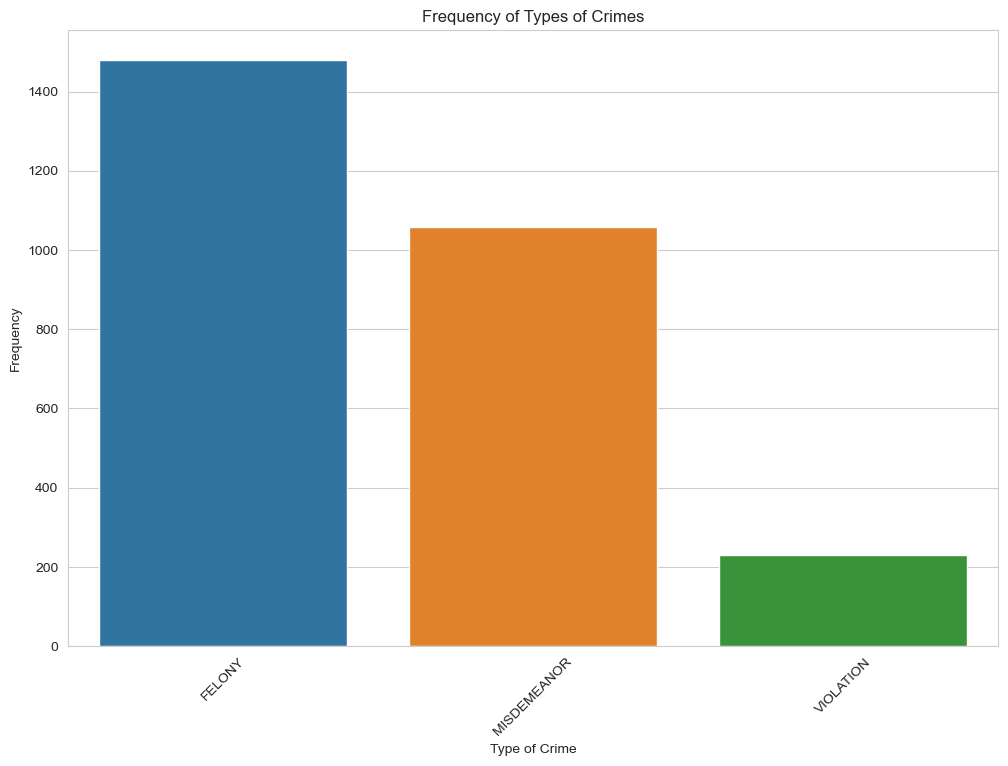

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named nypd_weather_merged and the column for crime types is 'Offence_Category'
# Count the number of occurrences of each crime type
crime_counts = nypd_weather_merged['Offence_Category'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=crime_counts.index, y=crime_counts.values)
plt.title('Frequency of Types of Crimes')
plt.xlabel('Type of Crime')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

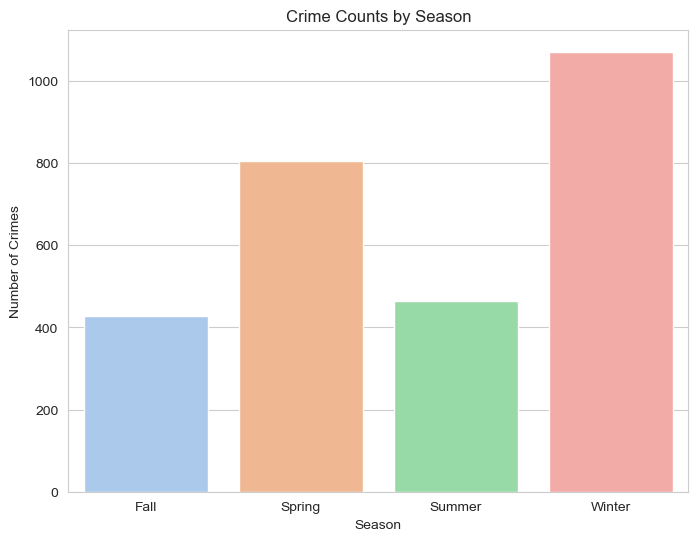

In [90]:
# Assuming 'nypd_weather_merged' has the necessary data
seasonal_crime_counts = nypd_weather_merged.groupby('Season').size().reset_index(name='Crime_Count')

# Plotting Crime Counts by Season
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal_crime_counts, x='Season', y='Crime_Count', palette='pastel')
plt.title('Crime Counts by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.show()


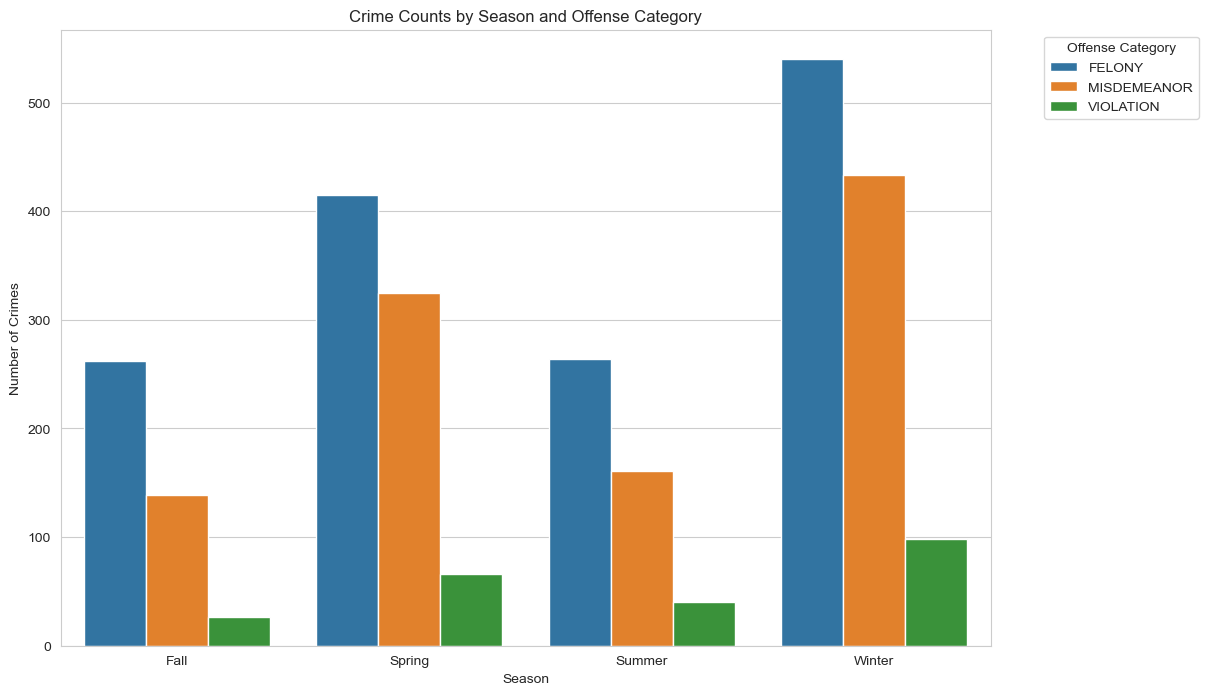

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'seasonal_offense_counts' DataFrame from the previous steps

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=seasonal_offense_counts, x='Season', y='Crime_Count', hue='Offence_Category')
plt.title('Crime Counts by Season and Offense Category')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.legend(title='Offense Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


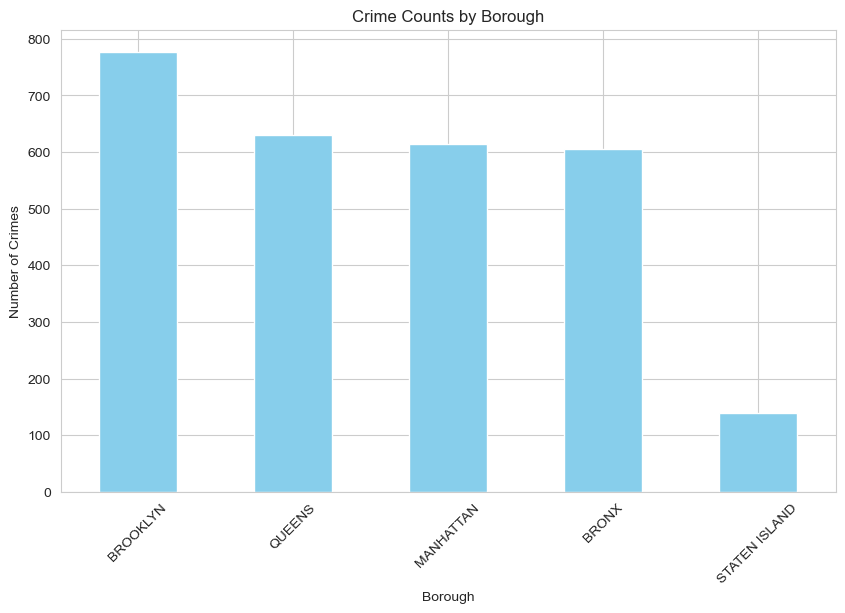

In [92]:
import matplotlib.pyplot as plt

# Assuming 'nypd_weather_merged' contains the necessary columns including 'Borough' and 'Complaint_Id'
borough_counts = nypd_weather_merged['Borough'].value_counts()

#Crime counts by Borough

plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='skyblue')
plt.title('Crime Counts by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


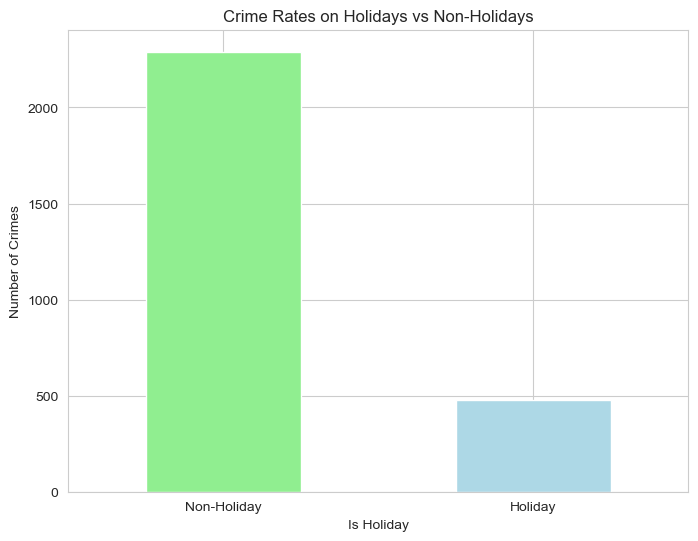

In [93]:
import matplotlib.pyplot as plt

# Assuming 'nypd_weather_merged' contains the 'Is_Holiday' column indicating if it's a holiday or not
holiday_counts = nypd_weather_merged['Is_Holiday'].value_counts()

#Holiday vs Non-Holiday

plt.figure(figsize=(8, 6))
holiday_counts.plot(kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Crime Rates on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Number of Crimes')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


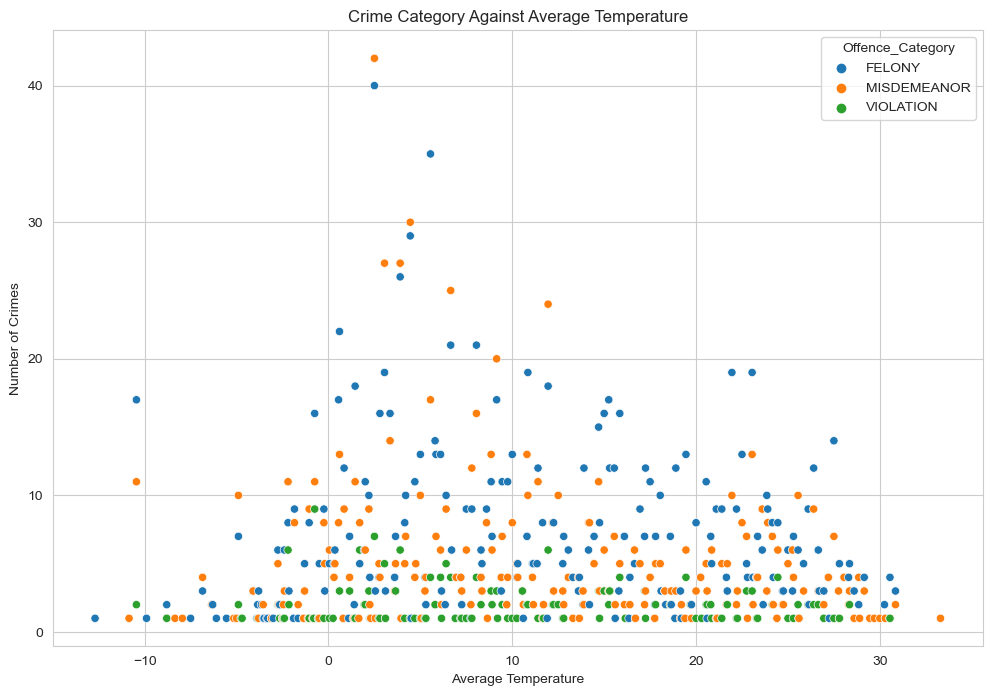

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named nypd_weather_merged
# Aggregate the data
agg_data = nypd_weather_merged.groupby(['AVG_TEMP', 'Offence_Category']).size().reset_index(name='Crime_Count')

# Checking if agg_data is created successfully
if 'agg_data' in locals():
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=agg_data, x='AVG_TEMP', y='Crime_Count', hue='Offence_Category')
    plt.title('Crime Category Against Average Temperature')
    plt.xlabel('Average Temperature')
    plt.ylabel('Number of Crimes')
    plt.show()
else:
    print("Aggregated data not created. Please check the previous steps.")


In [95]:
# Assuming 'nypd_data' is your dataset
crimes_2020 = nypd_data[nypd_data['Start_Date_Year'] == 2020]


In [96]:
offense_counts_2020 = crimes_2020['Offence_Category'].value_counts().reset_index()
offense_counts_2020.columns = ['Offense_Description', 'Count']


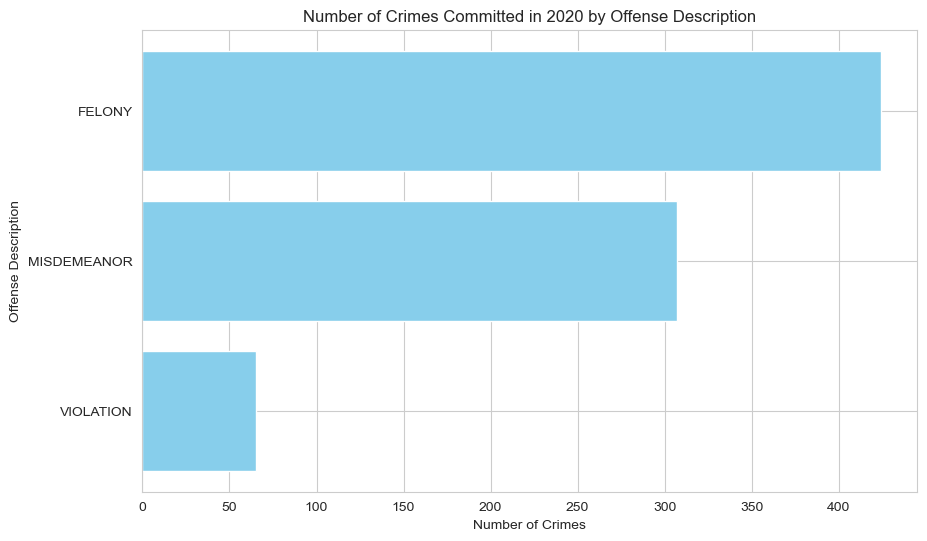

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(offense_counts_2020['Offense_Description'], offense_counts_2020['Count'], color='skyblue')
plt.xlabel('Number of Crimes')
plt.ylabel('Offense Description')
plt.title('Number of Crimes Committed in 2020 by Offense Description')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# SQL SNIPPETS

# List of all Holidays in 2015

<img src="SD4.jpg">

# Crime rates against Seasons

<img src="SD9.jpg">

# Crime rate by Borough

<img src="SD1.jpg">

# Count of complaints by offence description

<img src="SD2.jpg">

# Crime Count by Borough and Suspect Rate

<img src="SD6.jpg">

# Challenges and Solutions:

## Challenge: Dealing with missing or inconsistent data within the datasets (e.g., null values, data entry errors).
### Solution: Employing data imputation techniques (mean, median, mode imputation), using domain knowledge to infer missing values, or considering dropping rows with excessive missing data to ensure data quality.

## Challenge: The initial dataset encompassed a vast amount of data, totaling 30 million records. 
### Solution: Employed random sampling techniques to create a smaller representative subset, ensuring computational feasibility and quicker analyses.

## Challenge: Difficulties were encountered during the merging process. Integrating multiple datasets posed challenges due to varying formats, data inconsistencies, or overlapping entries, necessitating additional attention and refining strategies during the merging phase.
### Solution: Prioritized data cleaning and standardization techniques across multiple datasets to mitigate inconsistencies before merging. Identified and resolved overlapping or conflicting entries meticulously, ensuring accurate integration and avoiding duplication or loss of information.

# Future Steps

# Integration of Additional Datasets:
## Expansion Opportunity: Incorporate socio-economic data, public transportation usage statistics, or real estate information to provide a comprehensive analysis of crime patterns influenced by broader societal factors.

# Enhanced Visualization and Reporting:
## Interactive Dashboards; Develop interactive dashboards using tools like Tableau or Plotly to create user-friendly visual interfaces, facilitating stakeholders in exploring crime trends, demographic correlations, and other insights dynamically.

# THANK YOU!!!